In [2]:
import numpy as np
from numba import jit,njit,prange
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def dumb(n):
    dim = n
    A = 2*np.diag(np.ones(dim)) -np.diag(np.ones(dim-1), 1) - np.diag(np.ones(dim-1), -1)
    
    f = np.ones(dim)
    j = 0
    h = 1/dim
    while j < dim:
        f[j] = 100*np.exp(-10*j*h)*h**2
        j+=1
        
    a = np.linalg.solve(A,f)
    a[0]=0
    a[-1] =0
    
    return a

In [3]:
dumb(10)

array([ 0.        ,  1.70893369,  1.69552109,  1.54677321,  1.34823826,
        1.13138767,  0.90779913,  0.68173184,  0.45475267,  0.        ])

In [4]:
%timeit dumb(10)

The slowest run took 4.14 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 54.7 µs per loop


In [5]:
%timeit dumb(100)

1000 loops, best of 3: 405 µs per loop


In [6]:
%timeit dumb(1000)

10 loops, best of 3: 38.1 ms per loop


In [7]:
%timeit dumb(10000)

1 loop, best of 3: 16.8 s per loop


In [4]:
def tridag(n):
    dim = n
    h = 1/dim
    d = np.ones(dim+1)
    b = np.ones(dim+1)
    sol = np.ones(dim+1)
    d[0]=2
    d[dim]=2
    sol[0]=0
    sol[dim]=0
    
    i = 1
    while i < dim:
        d[i] = (i+1.)/i
        i+=1
    j = 0    
    while j <= dim:
        b[j] = 100*np.exp(-10*j*h)*h**2
        j+=1
    
    for i in range(2,dim):
        b[i] = b[i] + (b[i-1]/d[i-1])
        
    sol[dim-1] = b[dim-1]/d[dim-1]
    
    for j in range(dim-2,0,-1):
        sol[j] = (b[j]+sol[j+1])/d[j]
        
    return sol

In [9]:
tridag(10)

array([ 0.        ,  0.48991353,  0.61194761,  0.59864642,  0.53555815,
        0.45415425,  0.3660124 ,  0.27539179,  0.18385931,  0.09199136,  0.        ])

In [10]:
%timeit tridag(10)

10000 loops, best of 3: 35.5 µs per loop


In [11]:
%timeit tridag(100)

1000 loops, best of 3: 279 µs per loop


In [12]:
%timeit tridag(1000)

100 loops, best of 3: 2.75 ms per loop


In [13]:
%timeit tridag(10000)

10 loops, best of 3: 31.4 ms per loop


In [14]:
@njit(parallel = True)
def tridag_numba(n):
    dim = n
    h = 1/dim
    d = np.ones(dim+1)
    b = np.ones(dim+1)
    sol = np.ones(dim+1)
    x = np.ones(dim+1)
    d[0]=2
    d[dim]=2
    sol[0]=0
    sol[dim]=0
    
    i = 1
    while i < dim:
        d[i] = (i+1.)/i
        i+=1
    j = 0    
    while j <= dim:
        x[j] = j*h
        b[j] = 100*np.exp(-10*x[j])*h**2
        j+=1
    
    for i in prange(2,dim):
        b[i] = b[i] + (b[i-1]/d[i-1])
    sol[dim-1] = b[dim-1]/d[dim-1]
    for j in range(dim-2,0,-1):
        sol[j] = (b[j]+sol[j+1])/d[j]
        
    return sol

In [15]:
tridag_numba(10)

array([ 0.        ,  0.48991353,  0.61194761,  0.59864642,  0.53555815,
        0.45415425,  0.3660124 ,  0.27539179,  0.18385931,  0.09199136,  0.        ])

In [16]:
%timeit tridag_numba(10)

The slowest run took 4.79 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 38.8 µs per loop


In [17]:
%timeit tridag_numba(100)

The slowest run took 5.29 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 50.6 µs per loop


In [18]:
%timeit tridag_numba(1000)

The slowest run took 8.08 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 83.1 µs per loop


In [19]:
%timeit tridag_numba(10000)

The slowest run took 4.75 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 308 µs per loop


In [6]:
size = [10,100,1000,10000]
time_d = [54.7e-6,405e-6,38.1e-3,16.8]
time_p = [35.5e-6,279e-6,2.75e-3,31.4e-3]
time_n = [38.8e-6,50.6e-6,83.1e-6,308e-6]


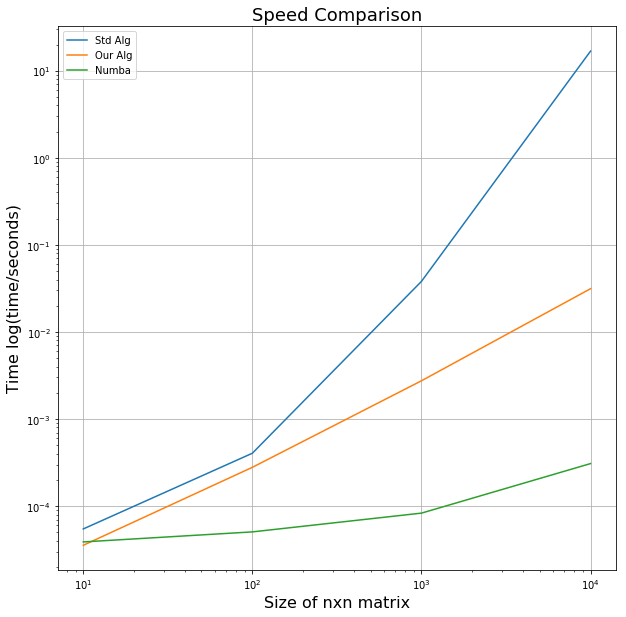

In [11]:
plt.figure(figsize=(10,10))
plt.loglog(size,time_d,label='Std Alg')
plt.loglog(size,time_p,label='Our Alg')
plt.loglog(size,time_n,label='Numba')
plt.grid()
plt.legend()
plt.title('Speed Comparison',fontsize=18)
plt.xlabel('Size of nxn matrix',fontsize=16)
plt.ylabel('Time log(time/seconds)',fontsize=16)